<a href="https://colab.research.google.com/github/satriaabraarr/PCVK_Ganjil_2024/blob/main/Modul7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [2]:
from google.colab import drive #Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image as im

Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

In [41]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Ukuran kernel
    kernel_height, kernel_width = kernel.shape

    # Menambahkan padding ke gambar jika dibutuhkan
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Ukuran gambar
    img_height, img_width = image.shape

    # Ukuran keluaran setelah konvolusi dengan stride
    output_height = (img_height - kernel_height) // stride + 1
    output_width = (img_width - kernel_width) // stride + 1

    # Inisialisasi output
    output = np.zeros((output_height, output_width))

    # Operasi konvolusi dengan stride
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = image[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width]

            # Cek apakah region sesuai dengan kernel untuk mencegah error di tepi gambar
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)

    return output

Load citra yang akan diproses dan ubah menjadi citra keabuan

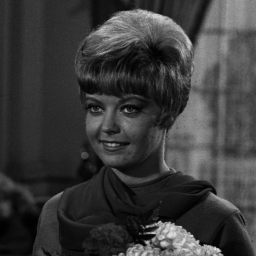

In [42]:
img = cv.imread('drive/MyDrive/PCVK/image/Assets/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

**Sharpen**

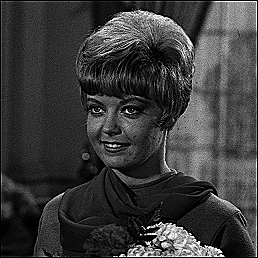

In [43]:
# Definisi kernel sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Terapkan konvolusi menggunakan kernel sharpen
output_img = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)

# Tampilkan hasil citra setelah konvolusi
cv2_imshow(output_img)

**Emboss**

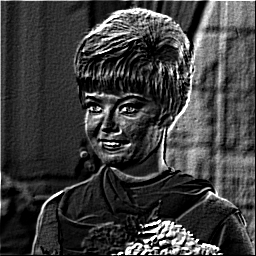

In [44]:
# Definisi kernel emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# Terapkan konvolusi menggunakan kernel emboss
output_img = convolution2d(img_gray, kernel_emboss, stride=1, padding=1)

# Tampilkan hasil citra setelah konvolusi dengan efek emboss
cv2_imshow(output_img)

**Left Sobel Edge Detection**

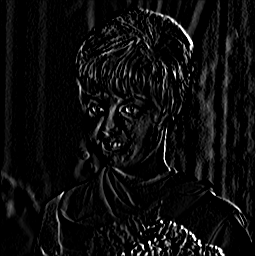

In [45]:
# Definisi sobel edge detection
kernel_left_sobel_edge_detection = np.array([[1, 0, -1],
                                             [2, 0, -2],
                                             [1, 0, -1]])

# Terapkan konvolusi menggunakan sobel edge detection
output_img = convolution2d(img_gray, kernel_left_sobel_edge_detection, stride=1, padding=1)

# Tampilkan hasil citra setelah konvolusi dengan efek emboss
cv2_imshow(output_img)

**Canny Edge Detection**

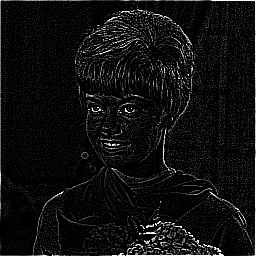

In [46]:
# Definisi canny edge detection
kernel_canny_edge_detection = np.array([[-1, -1, -1],
                                        [-1, 8, -1],
                                        [-1, -1, -1]])

# Terapkan konvolusi menggunakan cenny edge detection
output_img = convolution2d(img_gray, kernel_canny_edge_detection, stride=1, padding=1)

# Tampilkan hasil citra setelah konvolusi dengan efek emboss
cv2_imshow(output_img)